# ANALISIS DE DATOS

Una vez leidos los datos de medidas de 2018 vamos a pasar a analizar los datos de medidas de este año.

Vamos a plotear las medidas horarias de los grupos que hemos obtenido.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
Medida=pd.read_csv('./data_processed/df_2018.csv', index_col='datetime')

In [4]:
Medida.head(5)

,Unnamed: 0,Zona,Tarifa,Active
datetime,,,,
2018-01-01 01:00:00,0,Centro,2A,7.401
2018-01-01 02:00:00,1,Centro,2A,7.510
2018-01-01 03:00:00,2,Centro,2A,6.951
2018-01-01 04:00:00,3,Centro,2A,5.876
2018-01-01 05:00:00,4,Centro,2A,6.667


In [5]:
Medida.dtypes

Unnamed: 0      int64
Zona           object
Tarifa         object
Active        float64
dtype: object

In [6]:
Temperatura=pd.read_csv('./data_processed/Temperaturas.csv', index_col=False)

In [7]:
Temperatura.head(5)

,Unnamed: 0,Provincia,Fecha,Temperatura,Comunidad,Zona
0,0,Albacete,2017-01-11 07:00:00,3.5,Castilla la Mancha,Centro
1,1,Albacete,2017-01-11 08:00:00,4.0,Castilla la Mancha,Centro
2,2,Albacete,2017-01-11 09:00:00,4.5,Castilla la Mancha,Centro
3,3,Albacete,2017-01-11 10:00:00,5.5,Castilla la Mancha,Centro
4,4,Albacete,2017-01-11 11:00:00,7.0,Castilla la Mancha,Centro


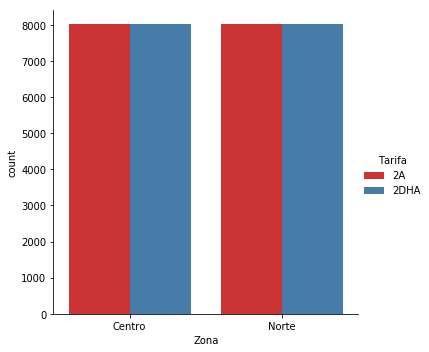

In [8]:
sns.catplot('Zona',hue='Tarifa' ,data=Medida, kind='count',palette='Set1' )
plt.show()

Vemos que tenemos los mismo datos para las dos zonas de las que tenemos medidas y para ambas tarifas en cada zona. Lo que quiere decir que tenemos dos curvas de consumo por zona geografica (Norte y Sur) con el mismo número de hora. 

Ya lo habíamos visto en el notebook anterior, pero de esta forma lo vemos graficamente.

In [9]:
Medida_2A=Medida.loc[Medida['Tarifa']=='2A']

Medida_2DHA=Medida.loc[Medida['Tarifa']=='2DHA']

In [10]:
# Medida_2A=Medida_2A.reset_index()

In [11]:
# Medida_2DHA=Medida_2DHA.reset_index()

In [12]:
Medida_2A.head()

,Unnamed: 0,Zona,Tarifa,Active
datetime,,,,
2018-01-01 01:00:00,0,Centro,2A,7.401
2018-01-01 02:00:00,1,Centro,2A,7.510
2018-01-01 03:00:00,2,Centro,2A,6.951
2018-01-01 04:00:00,3,Centro,2A,5.876
2018-01-01 05:00:00,4,Centro,2A,6.667


In [13]:
Medida_2A=Medida_2A[['Zona', 'Active']]
Medida_2DHA=Medida_2DHA[['Zona', 'Active']]

In [14]:
Medida_2DHA.index

Index(['2018-01-01 01:00:00', '2018-01-01 02:00:00', '2018-01-01 03:00:00',
       '2018-01-01 04:00:00', '2018-01-01 05:00:00', '2018-01-01 06:00:00',
       '2018-01-01 07:00:00', '2018-01-01 08:00:00', '2018-01-01 09:00:00',
       '2018-01-01 10:00:00',
       ...
       '2018-11-30 15:00:00', '2018-11-30 16:00:00', '2018-11-30 17:00:00',
       '2018-11-30 18:00:00', '2018-11-30 19:00:00', '2018-11-30 20:00:00',
       '2018-11-30 21:00:00', '2018-11-30 22:00:00', '2018-11-30 23:00:00',
       '2018-12-01 00:00:00'],
      dtype='object', name='datetime', length=16032)

In [15]:
Medida_2A.head()

,Zona,Active
datetime,,
2018-01-01 01:00:00,Centro,7.401
2018-01-01 02:00:00,Centro,7.510
2018-01-01 03:00:00,Centro,6.951
2018-01-01 04:00:00,Centro,5.876
2018-01-01 05:00:00,Centro,6.667


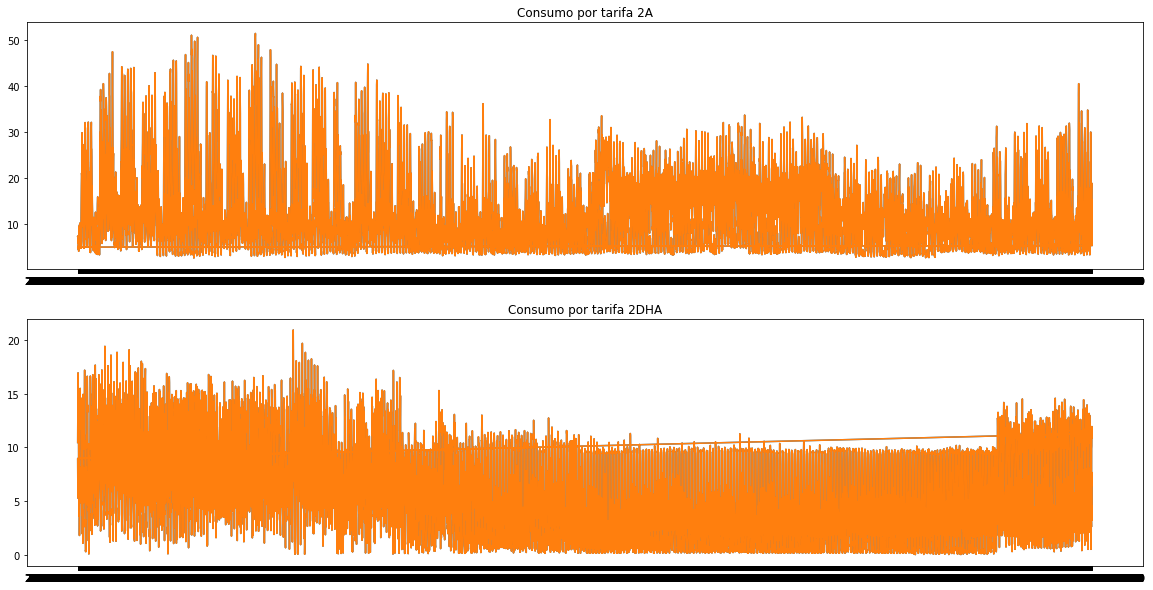

In [24]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.title('Consumo por tarifa 2A') 
plt.plot(Medida_2A['Active'], label='Centro')
plt.plot(Medida_2A['Active'], label='Norte')


plt.subplot(2,1,2)
plt.title('Consumo por tarifa 2DHA') 
plt.plot(Medida_2DHA['Active'], label='Centro')
plt.plot(Medida_2DHA['Active'], label='Norte')

plt.show()

Con este grafico vemos el perfil de consumo de nuestros clientes para ambas tarifas y para ambas zonas. 

En el caso de la tarifa 2A se puede apreciar, que aproximadamente el consumo del Q1 y Q2 de 2018 es atipico y no refleja la realidad del consumo de los clientes de esta tarifa, por lo que podríamos pensar que está sesgado, y hay un alto porcentaje de clientes que distorsionan el consumo de ese periodo.

En el caso de la tarifa 2DHA sin embargo los consumos atipicos se dan en la primera parte de la grafica y en la ultima. El perfil de consumo de los clientes en esta tarifa es muy predecible, y muy estable, consumen lo mismo cada día de la semana, sin embargo en estos primero meses y en los ultimo también cabría pensar que los datos están sesgados.

# Agrupamos por Fecha, Hora, Provincia, Tarifa

Por motivmos de confidencialidad no puedo mostrar el origen de los datos, que son curvas de consumo horario por CUPS. Sin embargo a partir de ahora trabajermos con curvas de consumo horario agrupadas por estos campos que son suficientes para el desarrollo del modelo.


In [26]:
Medida.shape


(32064, 4)

Como no tengo curva de consumo completa para todos los puntos para todas las horas de los dos años, voy a calcular el número de puntos por hora y la suma de la energía para cada hora, de esta manera si divido la suma de la energía entre el número de puntos, tendría un consumo medio para cada uno de los grupos que voy a tener.

In [27]:
# !conda update seaborn

In [28]:
sns.__version__

'0.9.0'

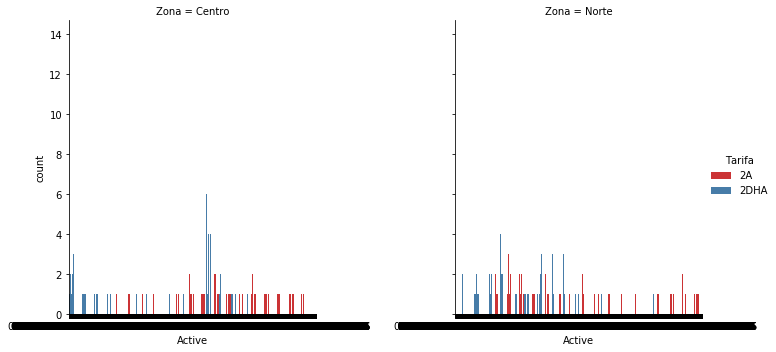

In [29]:
sns.catplot('Active',data=Medida,kind='count',
            hue='Tarifa',col='Zona',
            palette='Set1');
